# matplotlib-examples
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/millernb%2Fmatplotlib-examples/HEAD?labpath=examples.ipynb)

A collection of examples for matplotlib. Click the Binder link above to run these examples in your web browser.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set the default size & font size for all figures
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams['font.size']  = 14

# used to reduce the size of the git repo; n.b.: random.seed has been deprecated by RandomState
np.random.seed(42) 

## Example 1: a line
This example is about as simple as it gets; it demonstrates the bare minimum for creating a plot

In [2]:
def plot_line(x, m, b):
    # plots a line with slope m, y-intercept b

    fig, ax = plt.subplots()

    y = m *x + b
    ax.plot(x, y)

    plt.close()
    return fig

plot_line(
    x=np.linspace(-5, 5), 
    m=2,
    b=1  
)

# save fig -- I'd highly recommend saving as a pdf!
#   fig = plot_line(x=np.linspace(-5, 5), m=2, b=1)
#   fig.savefig('plot.pdf')

## Examples 2: multiple lines
This example demonstrates:
1. manually setting the size of a figure
1. adding multiple plots to the same axis
1. editing linestyle (`ls`) and marker options
1. setting the title/axis labels
1. creating a legend using the `label` argument

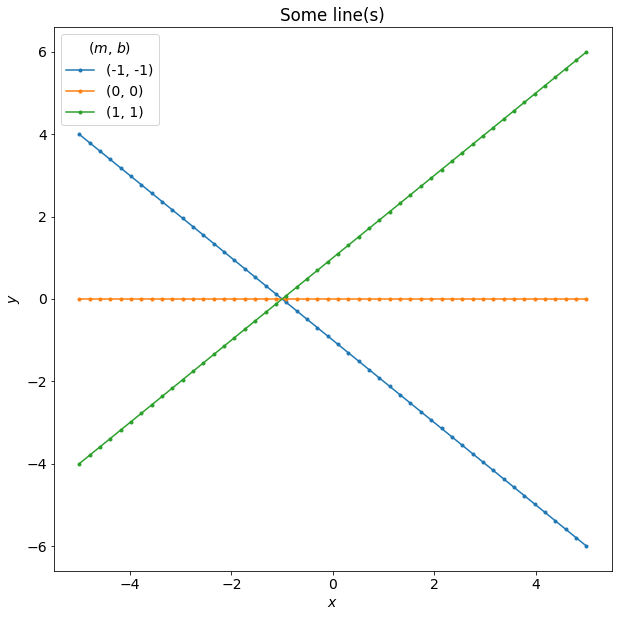

In [3]:
def plot_lines(x, m_arr, b_arr):
    # a similar plot except with more features

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10) # sets size of figure

    for m, b in zip(m_arr, b_arr):
        y = m *x + b

        ax.plot(x, y, 
            label='(%s, %s)'%(m, b), # add labels for legend
            ls='-',  # manually set the linestyle
            marker='.' # show each individual point
        )

    ax.set_title('Some line(s)')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(title='($m$, $b$)') # note that the title argument is optional

    plt.close()
    return fig

plot_lines(
    x=np.linspace(-5, 5), 
    m_arr=[-1, 0, 1],
    b_arr=[-1, 0, 1]  
)


## Example 3: a parabola
This example demonstrates:
1. using a function to update an axis by passing the axis as an argument and returning it after modification
1. specifying the color of a plot
1. writing lambda functions

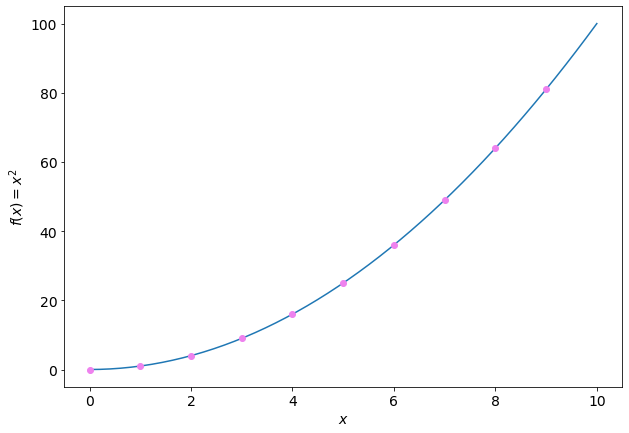

In [4]:
def add_point_to_ax(ax, x, y):
    ax.plot(x, y, marker='o', color='violet')
    return ax

def add_function_to_ax(ax, x, f):
    ax.plot(x, f(x))
    return ax

def plot_parabola():
    fig, ax = plt.subplots()

    x = np.linspace(0, 10)
    f = lambda x : x**2 # lambda functions allow one to quickly write one-line functions
    ax = add_function_to_ax(ax, x, f)

    # add only the points for integer values of x
    for xi in np.arange(10):
        xi, yi = xi, xi**2
        ax = add_point_to_ax(ax, xi, yi)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x) = x^2$')

    plt.close()
    return fig

plot_parabola()

## Example 4: random data
This example demonstrates:
1. creating multiple axes
1. using gridspec_kw and the `sharex` flag
1. plotting data with uncertainties
1. plotting a band
1. adding colors to a scatter plot (`vmin`, `vmax`, `c`, and `cmap`)
1. modifying the order in which plots are drawn (`zorder`)
1. setting the transparency of a plot (`alpha`)
1. changing (disabling) the xticks on an axis

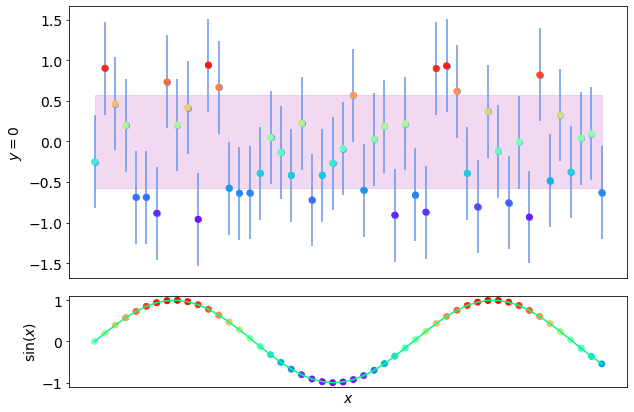

In [5]:
def add_band_to_ax(ax, x, y_low, y_high):
    ax.fill_between(x, y_low, y_high, alpha=0.4, color='plum')
    return ax

def add_error_to_ax(ax, x, y, y_low, y_high):
    ax.errorbar(x=x, xerr=None, y=y, yerr=[y-y_low, y_high-y], ls='', marker='o', color='cornflowerblue')
    return ax

def add_color_to_points(ax, x, y):
    ax.scatter(x, y, c=y, zorder=5, vmin=-1, vmax=1, cmap='rainbow')
    return ax

def plot_two_axes():
    x = np.linspace(0, 10)
    y = np.random.uniform(low=-1, high=+1, size=len(x))
    y_err = np.repeat(np.std(y), len(x))

    fig, (ax1, ax2) = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [3, 1], 'hspace':0.1}, sharex=True)

    ax1 = add_band_to_ax(ax1, x, -y_err, +y_err)
    ax1 = add_error_to_ax(ax1, x, y, y-y_err, y+y_err)
    ax1 = add_color_to_points(ax1, x, y)

    ax2.plot(x, np.sin(x), zorder=7, color='springgreen')
    ax2 = add_color_to_points(ax2, x, np.sin(x))

    ax1.set_xticks([]) # hide xlabels on axis 1
    ax1.set_ylabel('$y=0$')
    ax2.set_xlabel('$x$')
    ax2.set_ylabel('sin$(x)$')
    plt.close()
    return fig


plot_two_axes()